In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
df = pd.read_csv(r"D:\Data Science Projects\Real-TimeFraudDetectionSystem\Dataset\creditcard2023.csv")

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285

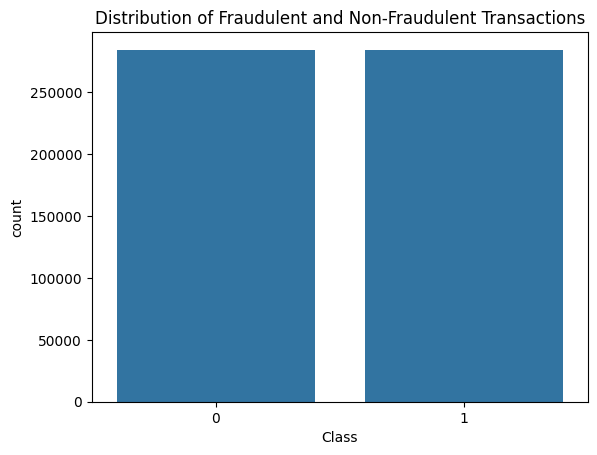

In [8]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.ffill(inplace=True)

# Basic statistics of the dataset
print(df.describe())

# Check the distribution of the target variable
print(df['Class'].value_counts())

# Plot the distribution of the target variable
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

In [9]:
# Define features (X) and target (y)
X = df.drop('Class', axis=1)  # Assuming 'Class' is the target column for fraud detection
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



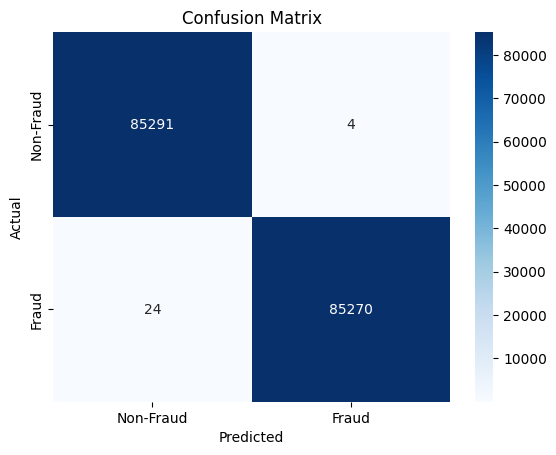

In [11]:
# Predict on the test set
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 10}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



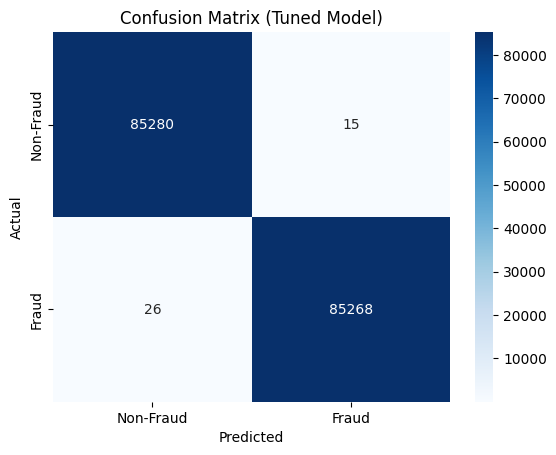

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the parameter grid for hyperparameter tuning (narrowed down)
param_dist = {
    'n_estimators': [100, 200],  # Reduced number of options
    'max_depth': [None, 10],     # Reduced number of options
    'min_samples_split': [2, 5]  # Reduced number of options
}

# Set up RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=3,  # Fewer iterations
    cv=3,      # Cross-validation
    scoring='recall',  # Optimize for recall
    n_jobs=-1,  # Use all processors
    random_state=42
)

# Optional: Use a smaller subset of data for faster tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Fit the model
random_search.fit(X_train_subset, y_train_subset)

# Display the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the tuned model on the full test set
y_pred_tuned = random_search.best_estimator_.predict(X_test)

# Classification report for the tuned model
print(classification_report(y_test, y_pred_tuned))

# Confusion matrix for the tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()